In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import linear_regression
import matplotlib.pyplot as plt
import plorts

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

from matplotlib.lines import Line2D

import energy_analysis_helpers

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lfw1i7bi because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
N_CORES_TOT = 32

EXP_ID = '240229-1449'
data_folder = '../data/' + EXP_ID + '/'
exp_filename = data_folder + 'energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

# Reading the Experiment Data

In [4]:
exp_df = energy_analysis_helpers.read_energy_log(exp_filename)
exp_df['energy_J'] = exp_df['energy_uJ'] / 1000000
exp_df = energy_analysis_helpers.read_iperf_log(exp_df, data_folder)
exp_df

,cc,mtu,bitrate,n_core,duration,cnt,energy_uJ,energy_J,total_cpu_util_percent,user_cpu_util_percent,system_cpu_util_percent,time_sec,sent_bytes,bps,rtx_pkts,min_rtt,mean_rtt,max_rtt,max_cwnd
0,stress,9000,0,0,10.0,1,2.261754e+08,226.175446,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,stress,9000,0,0,10.0,2,2.338184e+08,233.818371,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,stress,9000,0,0,10.0,3,2.224779e+08,222.477946,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,stress,9000,0,0,10.0,4,2.254433e+08,225.443271,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,stress,9000,0,0,10.0,5,2.244875e+08,224.487525,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,cubic,9000,10,0,100.0,6,3.547349e+09,3547.348768,23.485367,2.661222,20.824146,100.000093,1.176830e+11,9.414631e+09,0.0,1.101,1.102,1.103,1721672.0
4316,cubic,9000,10,0,100.0,7,3.576495e+09,3576.495178,24.291345,2.604511,21.686835,100.000195,1.176835e+11,9.414663e+09,0.0,1.092,1.102,1.112,2373272.0
4317,cubic,9000,10,0,100.0,8,3.544183e+09,3544.183066,23.542119,2.504859,21.037259,100.000112,1.176834e+11,9.414661e+09,0.0,1.118,1.130,1.142,2476080.0
4318,cubic,9000,10,0,100.0,9,3.543709e+09,3543.708823,22.952005,2.415479,20.536525,100.000071,1.176835e+11,9.414675e+09,0.0,1.103,1.117,1.131,1656512.0


# Energy Consumption Analysis

In [5]:
if ('n_core' not in exp_df.columns):
    exp_df.groupby(['duration', 'cc'])['energy_J'].mean().unstack().plot.bar(
        yerr=exp_df.groupby(['duration', 'cc'])['energy_J'].std().unstack(), 
        error_kw=dict(lw=2, capsize=3, capthick=1, ecolor='black')
        )

    plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
    plt.ylabel('Ave. Energy (J)', fontsize=FONT_SIZE)
    plt.xticks(fontsize=FONT_SIZE)
    plt.yticks(fontsize=FONT_SIZE)
    # plt.ylim((0,50))
    plt.xticks(rotation = 0)
    plt.grid(linestyle=LINE_STYLE)
    leg = plt.gca().legend(loc='upper left', frameon=False, fontsize=FONT_SIZE)
    # plt.setp(leg.get_title(),fontsize=FONT_SIZE)
    plt.gca().spines["right"].set_linestyle(LINE_STYLE)
    plt.gca().spines["right"].set_alpha(0.5)
    plt.gca().spines["right"].set_color('gray')
    plt.gca().spines["left"].set_linestyle(LINE_STYLE)
    plt.gca().spines["left"].set_alpha(0.5)
    plt.gca().spines["left"].set_color('gray')
    plt.gca().spines["top"].set_visible(False)
    # plt.gca().spines["top"].set_linestyle(LINE_STYLE)
    # plt.gca().spines["top"].set_alpha(0.5)
    # plt.gca().spines["top"].set_color('gray')
    plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
    plt.gca().spines["bottom"].set_alpha(0.5)
    plt.gca().spines["bottom"].set_color('gray')
    plt.tight_layout()

    if (SAVE_FIG):
        plt.savefig( out_dir + '/cubic_vs_sleep_energy.pdf')

    plt.show()

/tmp/ipykernel_3529183/1286152960.py:58: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


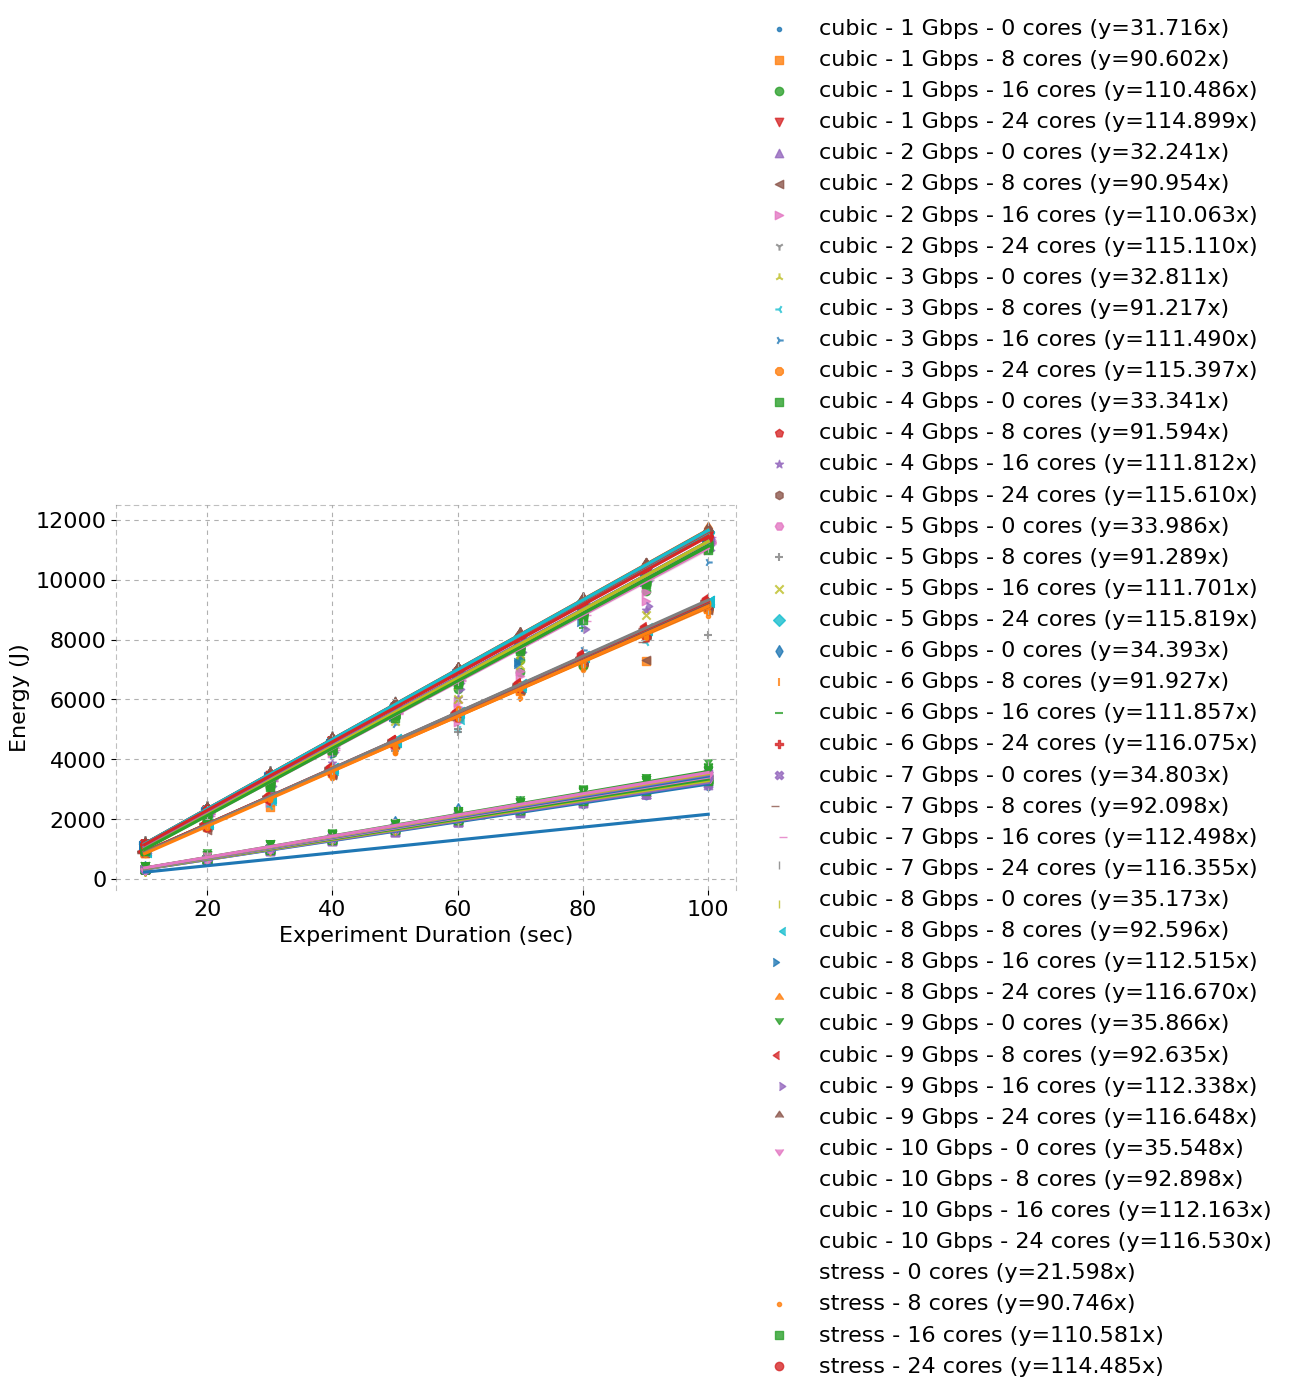

In [6]:
plt.figure(figsize=FIG_SIZE)

energy_per_time_df = []
marker = 0
for cca, df in exp_df.groupby('cc'):
    # x = np.hstack((np.reshape(ddf['time_sec'], (-1, 1)), np.ones((len(ddf),1))))
    # y = np.reshape(ddf['energy_kJ'], (-1, 1))
    # fit = np.linalg.lstsq(x, y, rcond=None)[0]

    if (cca in ['stress', 'sleep']):
        for n_core, ddf in df.groupby('n_core'):
            slope, _ = linear_regression(ddf['time_sec'], ddf['energy_J'], proportional=True)
            label = '{} - {} cores (y={:.3f}x)'.format(cca, n_core, slope)
            energy_per_time_df.append([cca, 0, n_core, slope])

            sns.regplot(ddf, x = 'time_sec', y = 'energy_J', label=label, 
                        ax=plt.gca(), marker=list(Line2D.markers.keys())[marker])
            marker += 1
            marker %= len(list(Line2D.markers.keys()))
    else:
        for bitrate, ddf in df.groupby('bitrate'):
            for n_core, dddf in ddf.groupby('n_core'):
                slope, _ = linear_regression(dddf['time_sec'], dddf['energy_J'], proportional=True)
                label = '{} - {} Gbps - {} cores (y={:.3f}x)'.format(cca, bitrate, n_core, slope)
                energy_per_time_df.append([cca, bitrate, n_core, slope])

                sns.regplot(dddf, x = 'time_sec', y = 'energy_J', label=label, 
                            ax=plt.gca(),  marker=list(Line2D.markers.keys())[marker])
                marker += 1
                marker %= len(list(Line2D.markers.keys()))
energy_per_time_df = pd.DataFrame(energy_per_time_df, columns=['cc', 'bitrate', 'n_core', 'power_W'])

plt.xlabel('Experiment Duration (sec)', fontsize=FONT_SIZE)
plt.ylabel('Energy (J)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# plt.ylim((0,40))
plt.xticks(rotation = 0)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='center left', frameon=False, fontsize=FONT_SIZE,
                       bbox_to_anchor=(1., 0.5))
# plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
# plt.gca().spines["top"].set_visible(False)
plt.gca().spines["top"].set_linestyle(LINE_STYLE)
plt.gca().spines["top"].set_alpha(0.5)
plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_visible(False)
# plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
# plt.gca().spines["bottom"].set_alpha(0.5)
# plt.gca().spines["bottom"].set_color('gray')

plt.tight_layout()
# plt.subplots_adjust(right=0.3, top=0.1, bottom=0.05)

if (SAVE_FIG):
    plt.savefig( out_dir + '/cubic_vs_stress_energy_fit.pdf')
    energy_per_time_df.to_csv(out_dir + '/energy_per_sec.csv', 
                              encoding='utf-8', index=False)

plt.show()

In [7]:
overhead_energy = \
    energy_per_time_df[energy_per_time_df.cc=='stress'][['n_core', 'power_W']].copy().set_index('n_core').to_dict()['power_W']
energy_per_time_df['power_W_noOverhead'] = \
    energy_per_time_df.apply(lambda row: row['power_W'] - overhead_energy[row['n_core']], axis=1)

In [8]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='power_W')
print('=== Power Consumption of Traffic and Background Cores (W) ===\n')
print(matrix)

=== Power Consumption of Traffic and Background Cores (W) ===

n_core          0          8           16          24
bitrate                                              
0        21.597549  90.746393  110.581102  114.485230
1        31.715746  90.601817  110.486391  114.899013
2        32.241498  90.953604  110.063244  115.109737
3        32.811357  91.217243  111.490196  115.397443
4        33.340551  91.593690  111.811641  115.610263
5        33.985621  91.289361  111.700812  115.819293
6        34.392533  91.927157  111.857482  116.075491
7        34.802779  92.097715  112.498459  116.354566
8        35.172728  92.596180  112.514996  116.670404
9        35.866199  92.634922  112.338239  116.647509
10       35.548324  92.898000  112.162583  116.529808


In [9]:
matrix = energy_per_time_df.pivot(index='bitrate', columns='n_core', values='power_W_noOverhead')
print('=== Power Consumption of Traffic Only (W) ===\n')
print(matrix)

=== Power Consumption of Traffic Only (W) ===

n_core          0         8         16        24
bitrate                                         
0         0.000000  0.000000  0.000000  0.000000
1        10.118197 -0.144576 -0.094711  0.413784
2        10.643949  0.207211 -0.517858  0.624507
3        11.213808  0.470850  0.909094  0.912213
4        11.743002  0.847297  1.230539  1.125034
5        12.388072  0.542968  1.119710  1.334063
6        12.794985  1.180764  1.276380  1.590261
7        13.205230  1.351322  1.917357  1.869337
8        13.575179  1.849787  1.933894  2.185174
9        14.268650  1.888529  1.757137  2.162279
10       13.950775  2.151607  1.581481  2.044579


Slope for 0 core(s) case: 91.1%
Slope for 8 core(s) case: 23.6%
Slope for 16 core(s) case: 22.5%
Slope for 24 core(s) case: 22.1%


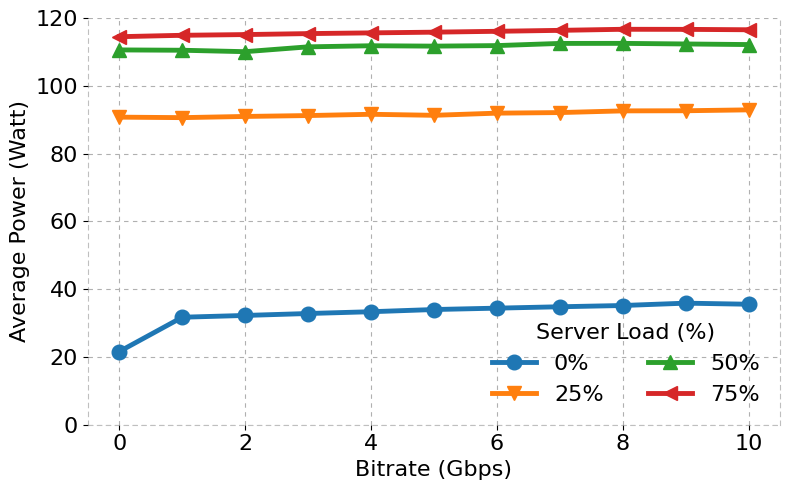

In [10]:
plt.figure(figsize=FIG_SIZE)
marker = 2
for n_core, df in energy_per_time_df.sort_values(by='bitrate').groupby('n_core'):
    x = np.hstack((np.reshape(df['bitrate'], (-1, 1)), np.ones((len(df),1))))
    y = np.reshape(df['power_W'], (-1, 1))
    fit = np.linalg.lstsq(x, y, rcond=None)[0]
    print("Slope for {} core(s) case: {:.1f}%".format(n_core, fit[0][0]*100))

    plt.plot(df['bitrate'], df['power_W'], 
             label="{:.0f}%".format(n_core/N_CORES_TOT*100), 
             linewidth=LINE_WIDTH, marker=list(Line2D.markers.keys())[marker],
             markersize=LINE_WIDTH*3)
    marker += 1

plt.xlabel('Bitrate (Gbps)', fontsize=FONT_SIZE)
plt.ylabel('Average Power (Watt)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
# plt.xlim((0, 10))
plt.ylim((0, 120))
plt.grid(linestyle=LINE_STYLE)
leg = plt.legend(loc='lower right', frameon=False, fontsize=FONT_SIZE, ncol=2, title='Server Load (%)')
plt.setp(leg.get_title(),fontsize=FONT_SIZE)

plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/energy_vs_bitrate_per_nCore.pdf')

plt.show()